In [1]:
import Pkg
Pkg.activate(@__DIR__)

  Activating project at `~/github/code/invariance-code`


In [2]:
using Plots, QuadGK
using Distributions, LinearAlgebra

In [3]:
# Plots backend
gr(fmt=:png) # pgfplotsx()

Plots.GRBackend()

---
# Example 4.1 
## (motivating example)

$$
f(x, y; \theta) = \Bigg(\boldsymbol{\theta}^{\mathsf T}\boldsymbol{\Phi}^{-1}\big(x, y\big) \Bigg)^2 \cdot \mathbb{1}\big(0 \le x, y \le 1\big)
$$
where $\boldsymbol\theta \in SO(2)$

In [4]:
seq = [0:0.01:0.25...; 0.26:0.1:0.74...; 0.75:0.01:1...]
N = Normal()
f(θ) = (x, y) -> ((cos(θ) * quantile(N, x)) + (sin(θ) * quantile(N, y)))^2

f (generic function with 1 method)

[ Info: Saved animation to /Users/svishwanath/github/code/invariance-code/tmp.gif


Plots.AnimatedGif("/Users/svishwanath/github/code/invariance-code/tmp.gif")
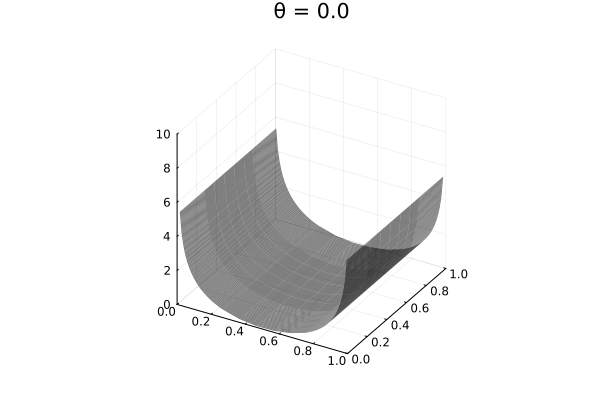

In [5]:
@gif for θ ∈ range(0, π, length=100)
    plot(
        seq, seq, f(θ),
        st=:surface,
        title="θ = $(round(θ, digits=3))",
        zlim=(0, 10),
        fa=0.5,
        cb = false,
        c=:inferno
    )
end

---
# Example 5.2


$$
\begin{aligned}
f(x; a, b) &= \begin{cases}
\frac 12 g(ax) & \text{if } x \ge 0\\ \\
\frac 12 g(-bx) & \text{if } x < 0
\end{cases}
\end{aligned}
$$
where,
$$
g \sim \frac 12 \Gamma(10, 5) + \frac 12 \Gamma(10, 2)\quad 
\text{and,} \quad \frac{1}{a} + \frac{1}{b} = 1
$$

In [6]:
w = 0.7
D = MixtureModel([Gamma(10, 5), Gamma(10, 2)], [w, 1 - w])
g(x) = pdf(D, x)
f(θ) = x -> x ≥ 0 ? 0.5 * g(x / θ) : 0.5 * g(-x / (2 - θ))

f (generic function with 1 method)

[ Info: Saved animation to /Users/svishwanath/github/code/invariance-code/tmp.gif


Plots.AnimatedGif("/Users/svishwanath/github/code/invariance-code/tmp.gif")
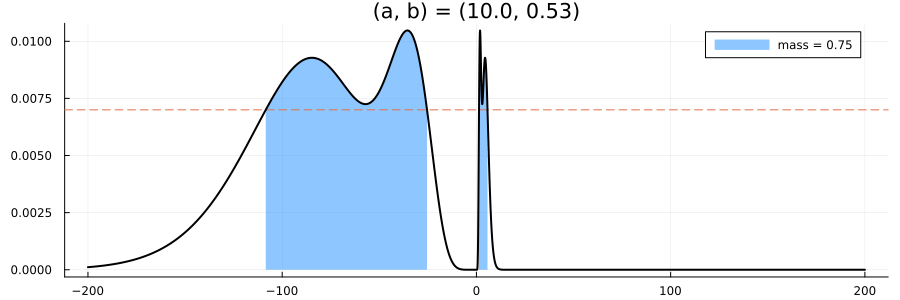

In [7]:
@gif for θ ∈ range(0.1, 1.9, length=50)
    t = 0.007
    xseq = -200:0.01:200
    ys = map(f(θ), xseq)
    yss = map(x -> x < t ? 0.0 : x, ys)

    h(x) = f(θ)(x) < t ? 0.0 : f(θ)(x)
    area = quadgk(h, -200, 200, rtol=1e-5)[1]

    plt = plot(xseq, yss, fill=0, la=0, fa=0.5, fc=:dodgerblue, label="mass = $(round(area, digits=3))")
    plt = hline(plt, [t], ls=:dash, lw=1, label="")
    plt = plot(plt, xseq, ys, c=:black, lw=2, label="")


    tit = "(a, b) = $(round.((1/θ, 1/(2-θ)), digits=2))"

    plot(plt, title=tit, size=(900, 300))
end

---

# Example 5.3

$$
f(x, y; \rho) = g\Bigg(\sqrt{\frac{{x^2 + y^2}}{1 + \rho \cos(\arctan(y/x))}} \Bigg)
$$
where $g(t) = e^{-t^2/4\pi} / 2\pi$ and $\rho \in (-1,1)$

In [8]:
function f(ρ)
    function f_(x, y)
        r = norm([x; y])
        θ = atan(y / x)
        return (2π)^-1 * exp(-r^2 / (1 * (1 + ρ * cos(θ))))
    end
    return f_
end
g(ρ) = (x, y) -> f(ρ)(x, y) >= exp(-0.5) / 2π
gr(c=palette(:inferno))

Plots.GRBackend()

[ Info: Saved animation to /Users/svishwanath/github/code/invariance-code/tmp.gif


Plots.AnimatedGif("/Users/svishwanath/github/code/invariance-code/tmp.gif")
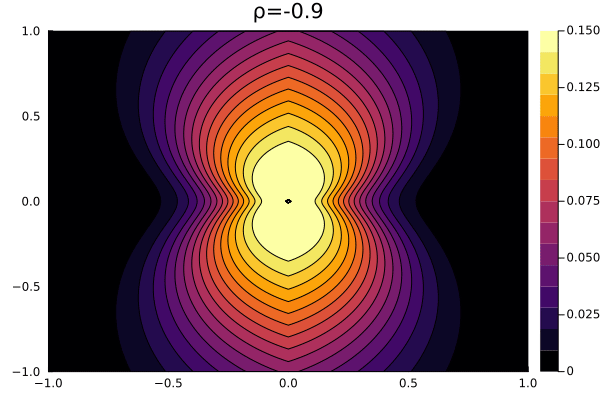

In [9]:
@gif for ρ in range(-0.9, 0.9, length=50)
    contourf(
        -1:0.01:1, -1:0.01:1, f(ρ), 
        clim=(0.0,0.15), colorbar=true, 
        title="ρ=$(round(ρ, digits=3))"
    )
end